In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

% matplotlib inline
plt.rcParams["figure.dpi"] = 200
np.set_printoptions(precision=3, suppress=True)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


# Task 1

In [2]:
from sklearn import datasets

# load data
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, 
                                                    random_state=6, stratify=iris.target)

# one hot encoder
num_classes = 3
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [3]:
y_train.shape

(112, 3)

In [3]:
model = Sequential([
    Dense(50, input_shape=(4,)),
    Dense(50, input_shape=(4,)),
    Activation('sigmoid'),
    Dense(3),
    Activation('softmax'),
])

model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=1, epochs=10, verbose=0)

In [4]:
# evaluate
score = model.evaluate(X_test, y_test,verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.183
Test Accuracy: 0.947


In [6]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from sklearn.model_selection import GridSearchCV

def make_model(optimizer="adam", hidden_size=2):
    model = Sequential([
        Dense(hidden_size, input_shape=(4,)),
        Activation('relu'),
        Dense(3),
        Activation('softmax'),
    ])
    model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])
    return model

clf = KerasClassifier(make_model)

param_grid = {'epochs': [1, 5, 10]}

grid = GridSearchCV(clf, param_grid=param_grid, cv=5)

In [7]:
grid.fit(X_train, y_train)

Epoch 1/1
89/89 [==============================] - 0s - loss: 1.1029 - acc: 0.3258     
Epoch 2/5
89/89 [==============================] - 0s - loss: 1.0898 - acc: 0.3258     
Epoch 3/5
89/89 [==============================] - 0s - loss: 1.0778 - acc: 0.3258     
Epoch 4/5
89/89 [==============================] - 0s - loss: 1.0652 - acc: 0.3258     
Epoch 5/5
89/89 [==============================] - 0s - loss: 1.0987 - acc: 0.3483     
Epoch 2/5
89/89 [==============================] - 0s - loss: 1.0986 - acc: 0.3483     
Epoch 3/5


GridSearchCV(cv=5, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x11ad80908>,
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'epochs': [1, 5, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [8]:
res = pd.DataFrame(grid.cv_results_)
res.pivot_table(index=["param_epochs"],
                values=['mean_train_score', "mean_test_score"])

,mean_test_score,mean_train_score
param_epochs,,
1,0.375000,0.377478
5,0.276786,0.268165
10,0.339286,0.397079


# Task 2

In [9]:
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

num_classes = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [10]:
model = Sequential([
    Dense(32, input_shape=(784,), activation='relu'),
    Dense(10, activation='softmax'),
])

model.compile(optimizer="adam", 
              loss="categorical_crossentropy", 
              metrics=['accuracy'])

model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.4969 - acc: 0.8642       

In [11]:
# evaluate
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss: {:.3f}".format(score[0]))
print("Test Accuracy: {:.3f}".format(score[1]))

Test loss: 0.118
Test Accuracy: 0.966


In [19]:
def plot_history(logger):
    df = pd.DataFrame(logger.history)
    df[['acc', 'val_acc']].plot()
    plt.ylabel("accuracy")
    df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
    plt.ylabel("loss")

In [ ]:
from keras.layers import Dropout

model_dropout = Sequential([
    Dense(1024, input_shape=(784,), activation='relu'),
    Dropout(.5),
    Dense(1024, activation='relu'),
    Dropout(.5),
    Dense(10, activation='softmax'),
])
model_dropout.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_dropout = model_dropout.fit(X_train, y_train, batch_size=128,
                            epochs=20, verbose=1, validation_split=.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 20s - loss: 0.2960 - acc: 0.9088 - val_loss: 0.0957 - val_acc: 0.9723

In [ ]:
df = pd.DataFrame(history_dropout.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
df[['loss', 'val_loss']].plot(linestyle='--', ax=plt.twinx())
plt.ylabel("loss")

## --> Missing comparison with vanilla method

# Task 3

In [8]:
import scipy.io
import matplotlib.pyplot as plt
train = scipy.io.loadmat('train_32x32')
test = scipy.io.loadmat('test_32x32')

In [9]:
X_train=train['X']
y_train=train['y']-1
X_test=test['X']
y_test=test['y']-1

In [10]:
X_train.shape

(32, 32, 3, 73257)

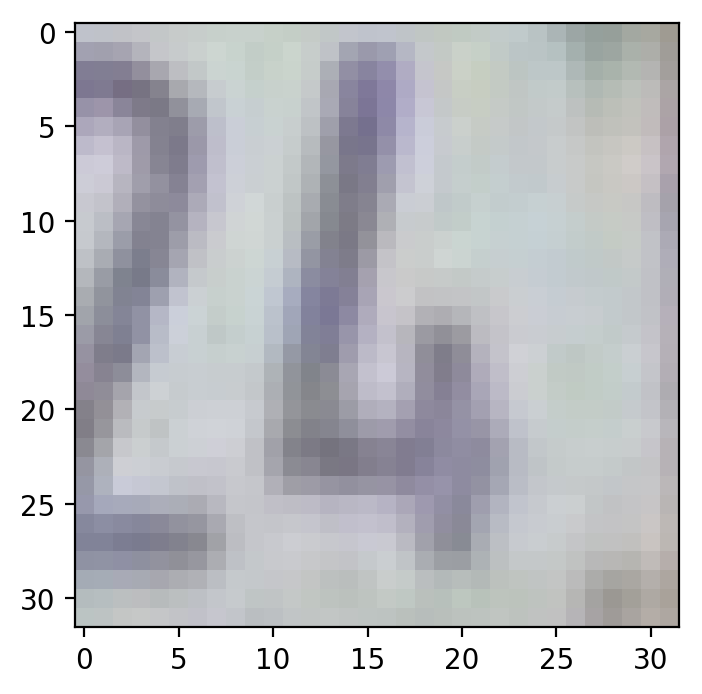

In [11]:
plt.imshow(X_train[:,:,:,55])

In [12]:
X_train_image=np.moveaxis(X_train,3,0)
y_train=keras.utils.to_categorical(y_train,10)
X_test_image=np.moveaxis(X_test,3,0)
y_test=keras.utils.to_categorical(y_test,10)

In [23]:
X_train_image.shape

(73257, 32, 32, 3)

[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


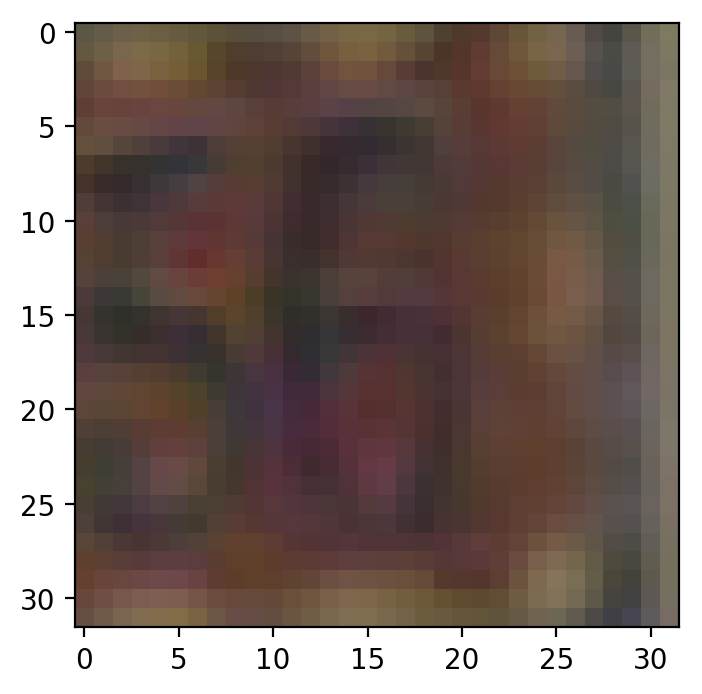

In [13]:
plt.imshow(X_train_image[2515,:,:,:])
print (y_train[2515])

In [16]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

batch_size = 128
num_classes = 10

input_shape = (32, 32, 3)

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

In [17]:
cnn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn = cnn.fit(X_train_image, y_train,
                      batch_size=128, epochs=30, verbose=1, validation_split=.1)

Train on 65931 samples, validate on 7326 samples
Epoch 1/30
65931/65931 [==============================] - 116s - loss: 2.0550 - acc: 0.4725 - val_loss: 1.3529 - val_acc: 0.5751
Epoch 2/30
65931/65931 [==============================] - 120s - loss: 1.0078 - acc: 0.6982 - val_loss: 0.8058 - val_acc: 0.7505
Epoch 3/30
65931/65931 [==============================] - 120s - loss: 0.7245 - acc: 0.7848 - val_loss: 0.6913 - val_acc: 0.7932
Epoch 4/30
65931/65931 [==============================] - 115s - loss: 0.6347 - acc: 0.8127 - val_loss: 0.6104 - val_acc: 0.8175
Epoch 5/30
65931/65931 [==============================] - 119s - loss: 0.5787 - acc: 0.8289 - val_loss: 0.6002 - val_acc: 0.8202
Epoch 6/30
65931/65931 [==============================] - 120s - loss: 0.5366 - acc: 0.8408 - val_loss: 0.5738 - val_acc: 0.8327
Epoch 7/30
65931/65931 [==============================] - 115s - loss: 0.4927 - acc: 0.8536 - val_loss: 0.5297 - val_acc: 0.8464
Epoch 8/30
65931/65931 [========================

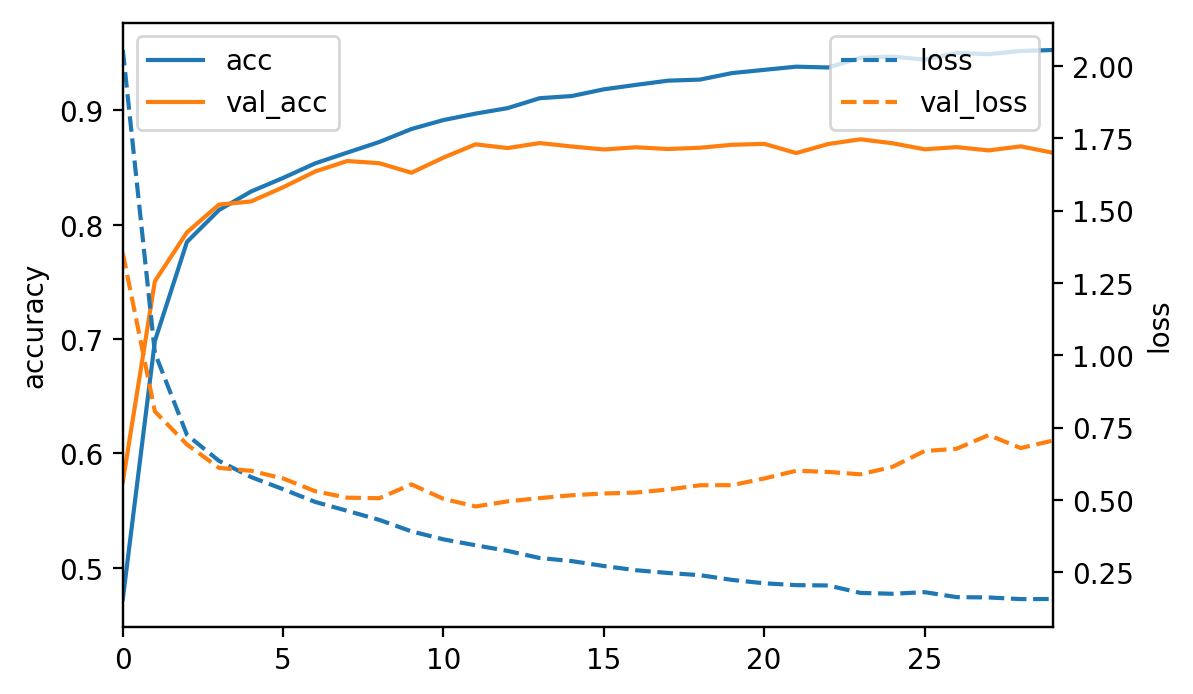

In [20]:
plot_history(history_cnn)

In [21]:
cnn.evaluate(X_test_image, y_test)

25984/26032 [============================>.] - ETA: 0s

[0.88672204619043427, 0.84595881991395205]

(0.8, 1)

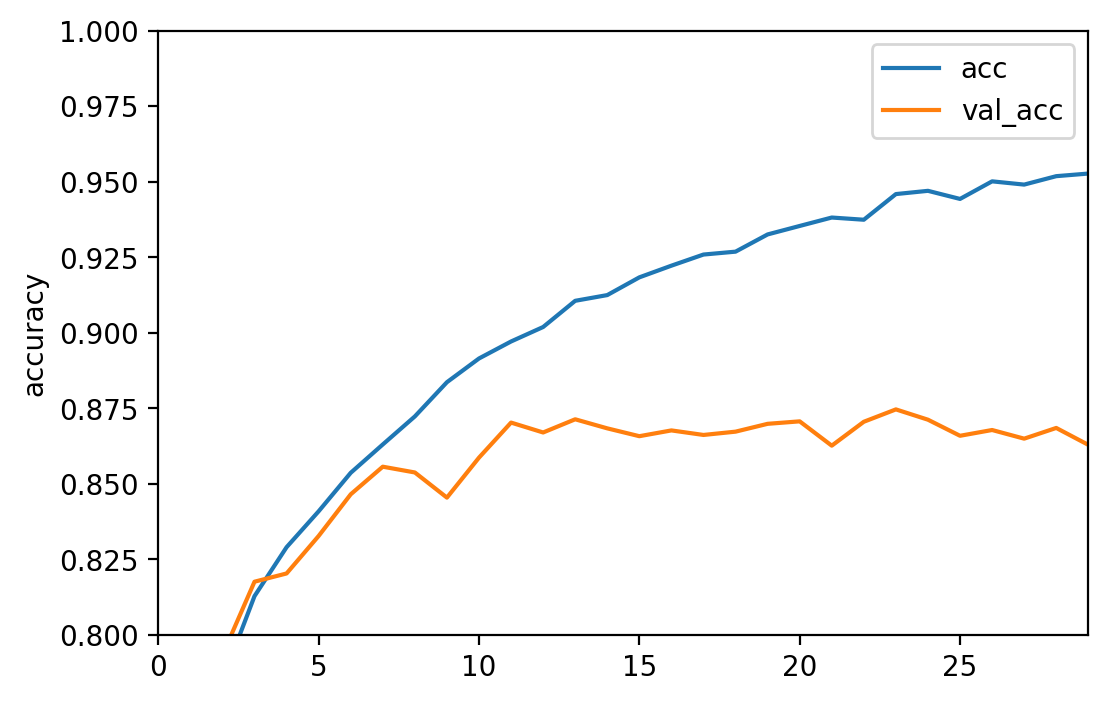

In [23]:
df = pd.DataFrame(history_cnn.history)
df[['acc', 'val_acc']].plot()
plt.ylabel("accuracy")
plt.ylim(.8, 1)

In [24]:
asdf = cnn.get_input_at(0)
from keras import backend as K

# with a Sequential model
get_1rd_layer_output = K.function([cnn.layers[0].input],
                                  [cnn.layers[0].output])
get_3rd_layer_output = K.function([cnn.layers[0].input],
                                  [cnn.layers[3].output])

layer1_output = get_1rd_layer_output([X_train_image[:5]])[0]
layer3_output = get_3rd_layer_output([X_train_image[:5]])[0]

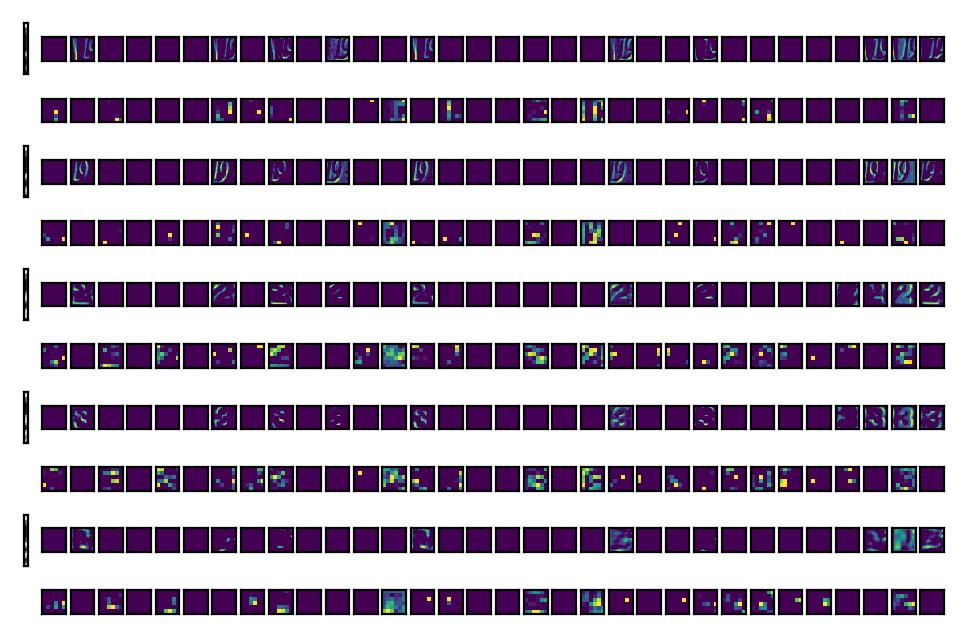

In [25]:
weights, biases = cnn.layers[0].get_weights()
n_images = layer1_output.shape[0]
n_filters = layer1_output.shape[3]
fig, axes = plt.subplots(n_images * 2, n_filters + 1, subplot_kw={'xticks': (), 'yticks': ()})
for i in range(layer1_output.shape[0]):
    # for reach input image (= 2 rows)
    axes[2 * i, 0].imshow(X_train[i, :, :, 0], cmap="gray_r")
    axes[2 * i + 1, 0].set_visible(False)
    for j in range(layer1_output.shape[3]):
        # for each feature map (same number in layer 1 and 3)
        axes[2 * i, j + 1].imshow(layer1_output[i, :, :, j])
        axes[2 * i + 1, j + 1].imshow(layer3_output[i, :, :, j])

In [32]:
from keras.layers import BatchNormalization

num_classes = 10
cnn_bn = Sequential()
cnn_bn.add(Conv2D(32, kernel_size=(3, 3),
                 input_shape=input_shape))
cnn_bn.add(Activation("relu"))
cnn_bn.add(BatchNormalization())
cnn_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_bn.add(Conv2D(32, (3, 3)))
cnn_bn.add(Activation("relu"))
cnn_bn.add(BatchNormalization())
cnn_bn.add(MaxPooling2D(pool_size=(2, 2)))
cnn_bn.add(Flatten())
cnn_bn.add(Dense(64, activation='relu'))
cnn_bn.add(Dense(num_classes, activation='softmax'))

In [37]:
cnn_bn.compile("adam", "categorical_crossentropy", metrics=['accuracy'])
history_cnn_bn = cnn_bn.fit(X_train_image, y_train,
                                        batch_size=128, epochs=30, verbose=1, validation_split=.1)

Train on 65931 samples, validate on 7326 samples
Epoch 1/10
65931/65931 [==============================] - 183s - loss: 0.4459 - acc: 0.8683 - val_loss: 0.5532 - val_acc: 0.8305

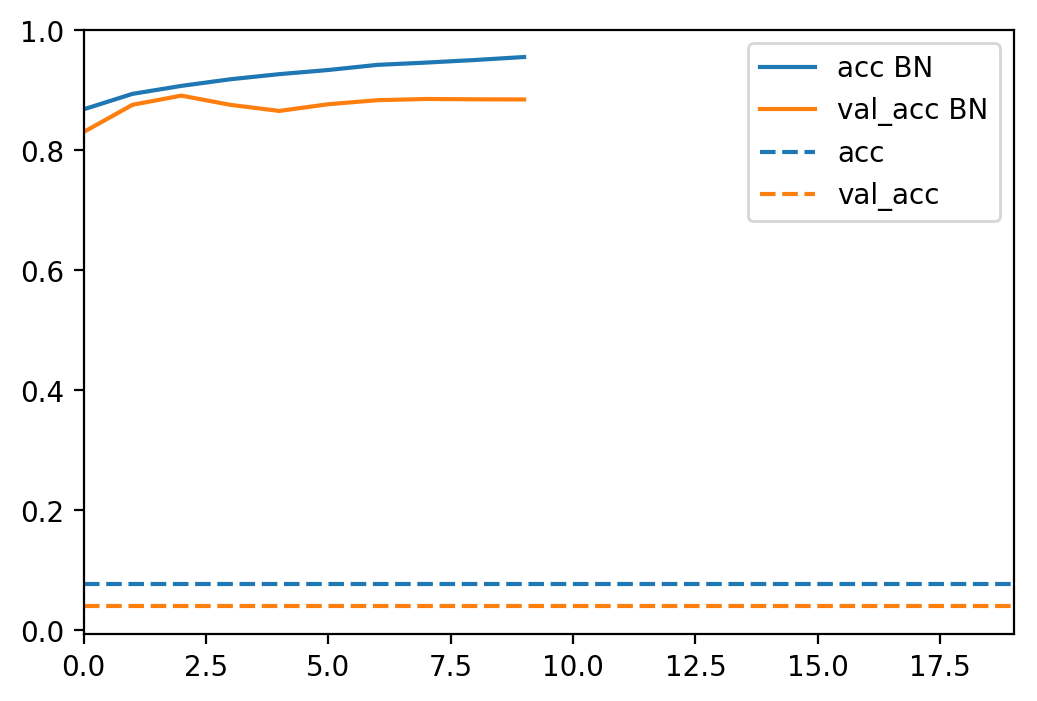

In [38]:
hist_bn = pd.DataFrame(history_cnn_bn.history)
hist = pd.DataFrame(history_cnn.history)
hist_bn.rename(columns=lambda x: x + " BN", inplace=True)
hist_bn[['acc BN', 'val_acc BN']].plot()
hist[['acc', 'val_acc']].plot(ax=plt.gca(), linestyle='--', color=[plt.cm.Vega10(0), plt.cm.Vega10(1)])

In [39]:
cnn_bn.evaluate(X_test_image, y_test)

26032/26032 [==============================] - 30s     

[0.51489348222112907, 0.87511524277811925]

# Task 4

In [104]:
import os

from keras import applications
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

In [34]:
# build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

In [93]:
# get all data than split later
data = pd.read_csv(os.path.join("annotations", "list.txt"), 
                         skiprows=6, sep=" ", 
                         names=['image_name', 'class_id', 'species', 'breed_id'])

In [97]:
img_name_list = data.image_name.tolist()

img_lsit = [image.load_img(os.path.join("images", name+".jpg"), target_size=(224, 224))
                 for name in img_name_list]

X = np.array([image.img_to_array(img) for img in img_lsit])

In [98]:
y = data.class_id.values

In [99]:
X.shape

(7349, 224, 224, 3)

In [108]:
y.shape

(7349,)

## --> subset size 200

In [117]:
X_pre = preprocess_input(X[:200, :, :, :])
features = model.predict(X_pre)

In [118]:
features.shape

(200, 7, 7, 512)

In [119]:
features_ = features.reshape(200, -1)

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(features_, 
                                                    y[:200], stratify=y[:200],
                                                    random_state=6)

In [122]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV().fit(X_train, y_train)

In [123]:
print(lr.score(X_train, y_train))

1.0


In [124]:
print(lr.score(X_test, y_test))

0.88


In [125]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr.predict(X_test))

array([[12,  0,  0,  0],
       [ 0, 10,  3,  0],
       [ 0,  3, 10,  0],
       [ 0,  0,  0, 12]])

In [13]:
import os

from keras import applications
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image

import sklearn

if sklearn.__version__.startswith('0.17'):
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegressionCV

In [14]:
# build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

# get all data than split later
data = pd.read_csv(os.path.join("annotations", "list.txt"), skiprows=6, sep=" ",
                   names=['image_name', 'class_id', 'species', 'breed_id'])

img_name_list = data.image_name.tolist()

img_list = [image.load_img(os.path.join("images", name+".jpg"), target_size=(224, 224))
            for name in img_name_list]

X = np.array([image.img_to_array(img) for img in img_list])

y = data.class_id.values

In [15]:
feature_file = 'task4_features.txt'

if not os.path.isfile(feature_file):
    X_pre = preprocess_input(X[:200, :, :, :])
    features = model.predict(X_pre)
    features_ = features.reshape(200, -1)
    np.savetxt(feature_file, features_)
else:
    features_ = np.loadtxt(feature_file)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features_, y[:200], stratify=y[:200], random_state=6)

In [18]:
lr = LogisticRegressionCV(verbose=1).fit(X_train, y_train)

print('Params: ', lr.get_params())
print('Train Score', lr.score(X_train, y_train))
print('Test Score', lr.score(X_test, y_test))

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    9.2s finished


Params:  {'verbose': 1, 'fit_intercept': True, 'class_weight': None, 'n_jobs': 1, 'random_state': None, 'max_iter': 100, 'multi_class': 'ovr', 'scoring': None, 'dual': False, 'refit': True, 'penalty': 'l2', 'solver': 'lbfgs', 'Cs': 10, 'cv': None, 'intercept_scaling': 1.0, 'tol': 0.0001}
Train Score 1.0
Test Score 0.92
